In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [156]:
data = pd.read_csv("asset_price_data (1).csv")
data = pd.DataFrame(data)
data.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


<h3 style="color: #008080;">Column standardization</h3>

In [157]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]

<h3 style="color: #008080;">Copy the dataset</h3>

In [158]:
pricing_data = data.copy()  

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

<h3 style="color: #008080;"> Formating the Datetypes</h3>

In [160]:
pricing_data['date'] = pd.to_datetime(pricing_data['date'])
pricing_data.dtypes 

date      datetime64[ns]
asset1           float64
asset2           float64
asset3           float64
asset4           float64
asset5           float64
dtype: object

<h3 style="color: #008080;"> Checking for duplicates, null values and empty spaces</h3>

In [161]:
def info_about_dataframe(pricing_data):
    print("\nInformation about the DataFrame:")
    print(f"Shape of DataFrame: {pricing_data.shape}")
    print(f"Data types:\n{pricing_data.dtypes}")
    
    print("\nMore info:")
    pricing_data.info()
    
    # null values
    print("\nChecking for null values:")
    print(pricing_data.isnull().sum())
    
    # duplicates
    print("\nChecking for duplicate rows:")
    duplicate_count = pricing_data.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    
    # empty spaces
    print("\nChecking for empty spaces in DataFrame:")
    empty_spaces = pricing_data.eq(" ").sum()
    print(f"Number of cells with only spaces in each column:\n{empty_spaces}")


In [162]:
info_about_dataframe(pricing_data)


Information about the DataFrame:
Shape of DataFrame: (783, 6)
Data types:
date      datetime64[ns]
asset1           float64
asset2           float64
asset3           float64
asset4           float64
asset5           float64
dtype: object

More info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    783 non-null    datetime64[ns]
 1   asset1  770 non-null    float64       
 2   asset2  770 non-null    float64       
 3   asset3  770 non-null    float64       
 4   asset4  734 non-null    float64       
 5   asset5  763 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 36.8 KB

Checking for null values:
date       0
asset1    13
asset2    13
asset3    13
asset4    49
asset5    20
dtype: int64

Checking for duplicate rows:
Number of duplicate rows: 0

Checking for empty spaces in DataFrame:
Number of cells 

<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

<h3 style="color: #008080;"> Descriptive Statitics </h3>

In [163]:
def descriptive_statitics(pricing_data):
    print("Descriptive Statitics")
    desc_stats = pricing_data.select_dtypes(include=['float64']).describe().T.round()
    return desc_stats

In [164]:
descriptive_statitics(pricing_data)

Descriptive Statitics


,count,mean,std,min,25%,50%,75%,max
asset1,770.0,249.0,7.0,230.0,247.0,251.0,253.0,259.0
asset2,770.0,76.0,14.0,49.0,65.0,72.0,89.0,105.0
asset3,770.0,31.0,3.0,23.0,29.0,31.0,34.0,39.0
asset4,734.0,327.0,13.0,273.0,319.0,327.0,340.0,346.0
asset5,763.0,54.0,8.0,37.0,49.0,53.0,60.0,71.0


<h3 style="color: #008080;"> Checking the Distributions  </h3>

In [165]:
def exploration(pricing_data):
    numerical_cols = pricing_data.select_dtypes(include=['float64']).columns
    ncols = 5
    nrows_num = (len(numerical_cols) + ncols - 1) // ncols  # number of charts per line
    custom_colors = ['#0b293f']
    fig, axes = plt.subplots(nrows=nrows_num, ncols=ncols, figsize=(20, nrows_num * 5))
    axes = axes.flatten()  # Flatten para facilitar a iteração nos eixos

    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        color = custom_colors[i % len(custom_colors)]
        sns.histplot(pricing_data[col], kde=True, ax=ax, color=color, bins=15)
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

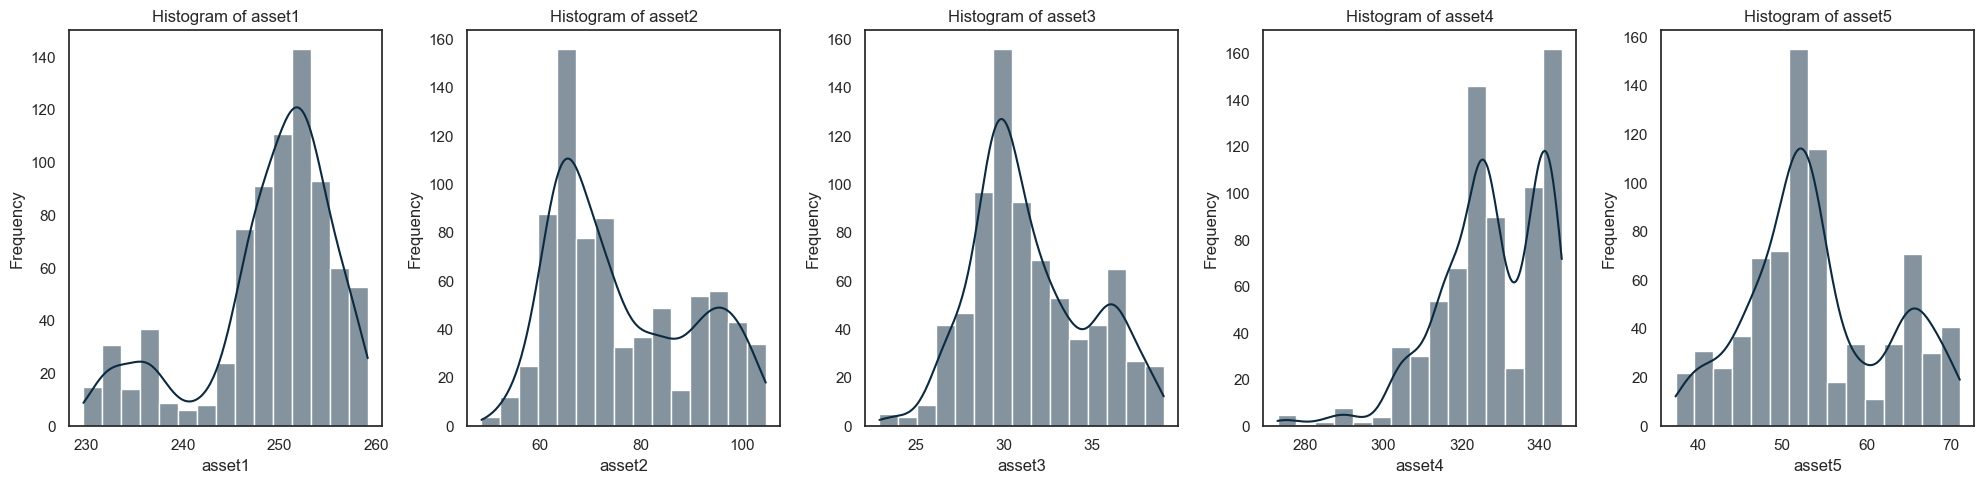

In [166]:
exploration(pricing_data)

<h3 style="color: #008080;"> Checking the Correlations  </h3>

        date  asset1  asset2  asset3  asset4  asset5
date    1.00    0.66    0.92    0.74    0.72    0.59
asset1  0.66    1.00    0.50    0.37    0.57    0.07
asset2  0.92    0.50    1.00    0.91    0.88    0.83
asset3  0.74    0.37    0.91    1.00    0.88    0.87
asset4  0.72    0.57    0.88    0.88    1.00    0.78
asset5  0.59    0.07    0.83    0.87    0.78    1.00


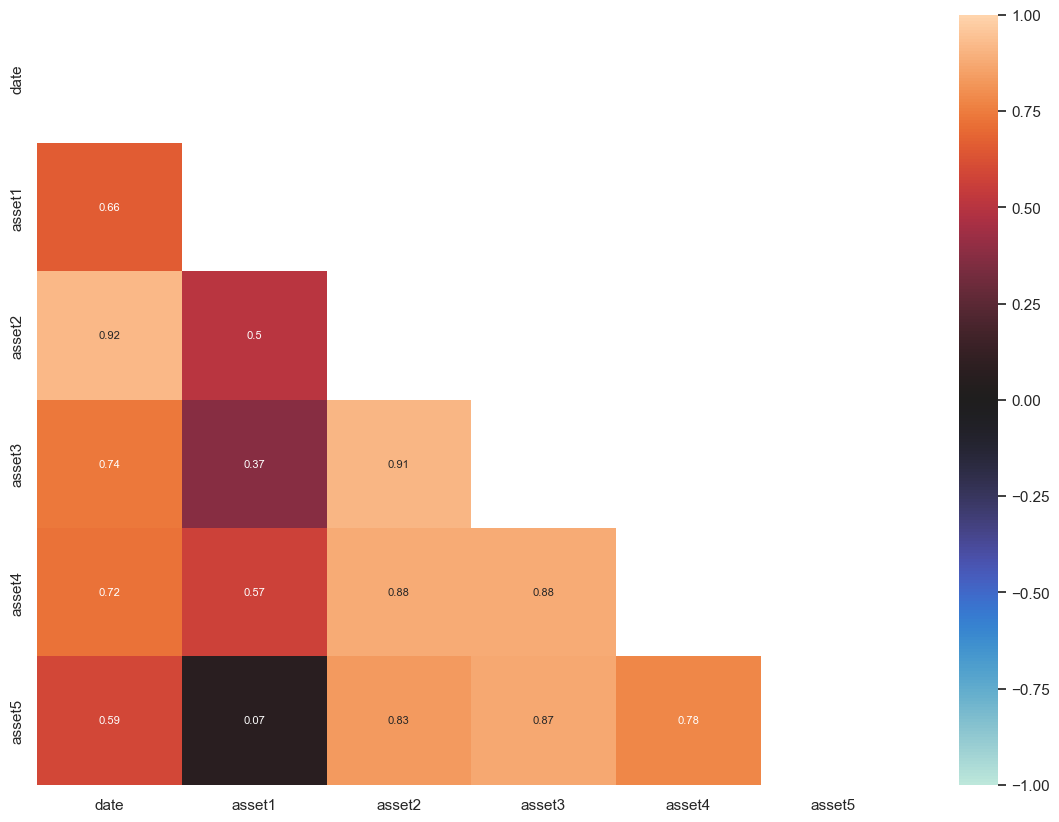

In [167]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(pricing_data.corr().round(2))

sns.set(style="white") # defing the backgroun d as white
corr = pricing_data.corr(method='pearson').round(2)
mask = np.triu(np.ones_like(corr, dtype=bool)) # avoid correlations of 1 on cases where its the same object
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, 
            vmin=-1, vmax=1, center=0, annot_kws={"fontsize": 8})
plt.show()

        date  asset1  asset2  asset3  asset4  asset5
date    1.00    0.66    0.92    0.74    0.72    0.59
asset1  0.66    1.00    0.50    0.37    0.57    0.07
asset2  0.92    0.50    1.00    0.91    0.88    0.83
asset3  0.74    0.37    0.91    1.00    0.88    0.87
asset4  0.72    0.57    0.88    0.88    1.00    0.78
asset5  0.59    0.07    0.83    0.87    0.78    1.00


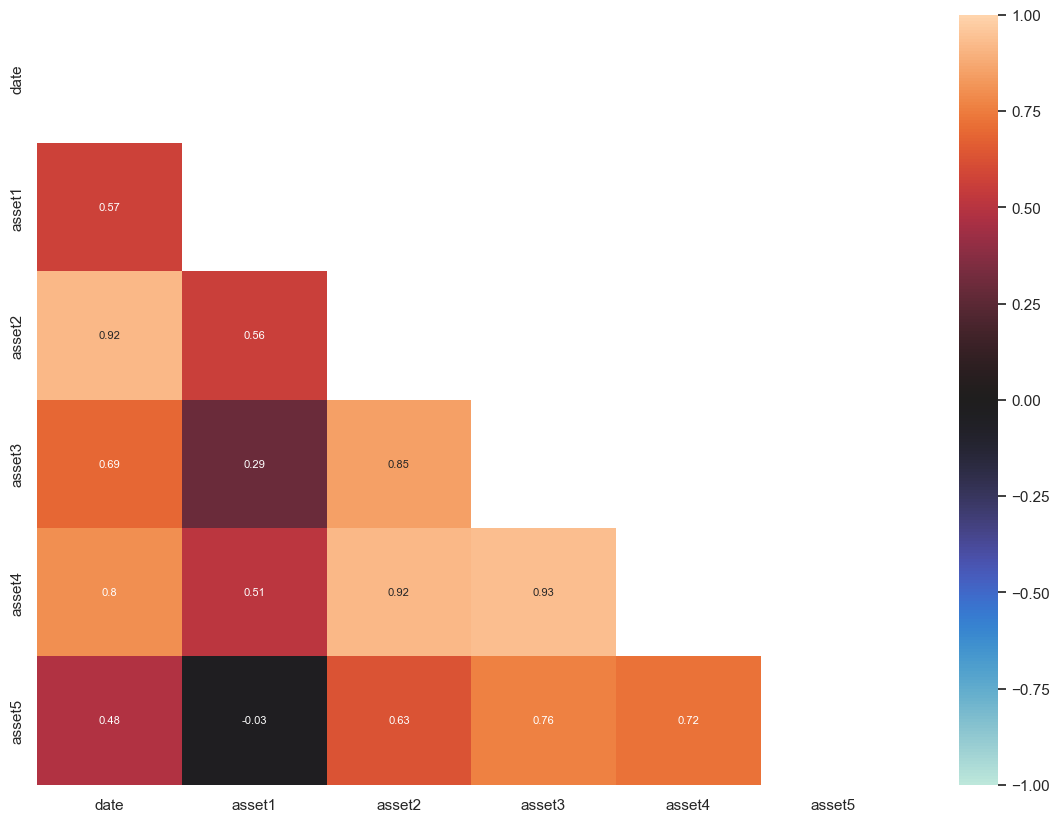

In [168]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(pricing_data.corr().round(2))

sns.set(style="white") # defing the backgroun d as white
corr = pricing_data.corr(method='spearman').round(2)
mask = np.triu(np.ones_like(corr, dtype=bool)) # avoid correlations of 1 on cases where its the same object
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, 
            vmin=-1, vmax=1, center=0, annot_kws={"fontsize": 8})
plt.show()

<h3 style="color: #008080;"> Returns  </h3>

In [170]:
def returns(pricing_data):
    """
    This function calculates the daily returns, cumulative returns, 
    mean daily returns, and volatility of a given dataset (financial asset data).
    
    Parameters:
    pricing_data (pd.DataFrame): A dataframe containing financial data with a 'date' column and asset prices.
    
    Returns:
    pd.DataFrame: A dataframe with the calculated statistics (mean returns and volatility) for each asset.
    """
    
    # Convert 'date' column to datetime format
    pricing_data['date'] = pd.to_datetime(pricing_data['date'])
    
    # Calculate daily returns
    daily_returns = pricing_data.set_index('date').pct_change()
    print("Daily Returns:")
    print(daily_returns)
    
    # Calculate cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()
    print("\nCumulative Returns:")
    print(cumulative_returns)
    
    # Calculate mean daily returns and volatility (standard deviation)
    mean_returns = daily_returns.mean()
    volatility = daily_returns.std()
    
    # Combine the statistics into a dataframe
    statistics_df = pd.DataFrame({
        'Mean Daily Returns': mean_returns,
        'Volatility (Standard Deviation)': volatility
    })
    
    # Return the dataframe containing the statistics
    return statistics_df

# Example usage:
statistics_df = returns(pricing_data)  # Assuming 'pricing_data' is your DataFrame with asset data
print("\nStatistics DataFrame:")
statistics_df



Daily Returns:
              asset1    asset2    asset3    asset4    asset5
date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432
2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242
2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792
2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192
...              ...       ...       ...       ...       ...
2021-12-27 -0.000913  0.007384  0.005439  0.000000  0.013443
2021-12-28  0.000064  0.005483  0.007599  0.000000 -0.001141
2021-12-29 -0.004862 -0.001588 -0.006647  0.000175 -0.003142
2021-12-30 -0.000696  0.002903  0.003346  0.000263  0.001432
2021-12-31  0.000829 -0.005322  0.000513  0.000117  0.000000

[783 rows x 5 columns]

Cumulative Returns:
              asset1    asset2    asset3    asset4    asset5
date                                                        
2019-01-02       NaN     

C:\Users\meite\AppData\Local\Temp\ipykernel_23172\4291806700.py:17: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = pricing_data.set_index('date').pct_change()


,Mean Daily Returns,Volatility (Standard Deviation)
asset1,0.000096,0.002990
asset2,0.000868,0.012004
asset3,0.000605,0.011673
asset4,0.000163,0.003320
asset5,0.000451,0.009435


<h1 style="color: #00BFFF;">Portfolio Analysis </h1>

In [171]:
portfolio_assets2 = pd.read_csv("portfolio_weights.csv")
portfolio_assets2= pd.DataFrame(portfolio_assets2)
portfolio_assets2.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [172]:
portfolio_assets2['date'] = pd.to_datetime(portfolio_assets2['date'])

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_asset_weights_over_time(portfolio_assets2):
    """
    This function plots the asset weights over time as an area chart.
    """
    portfolio_assets2['date'] = pd.to_datetime(portfolio_assets2['date'])
    portfolio_assets2.set_index('date', inplace=True)  # setting date as the index

    plt.figure(figsize=(10, 6))
    portfolio_assets2.plot.area(alpha=0.4, figsize=(12, 7))
    plt.title('Asset Weights Over Time')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

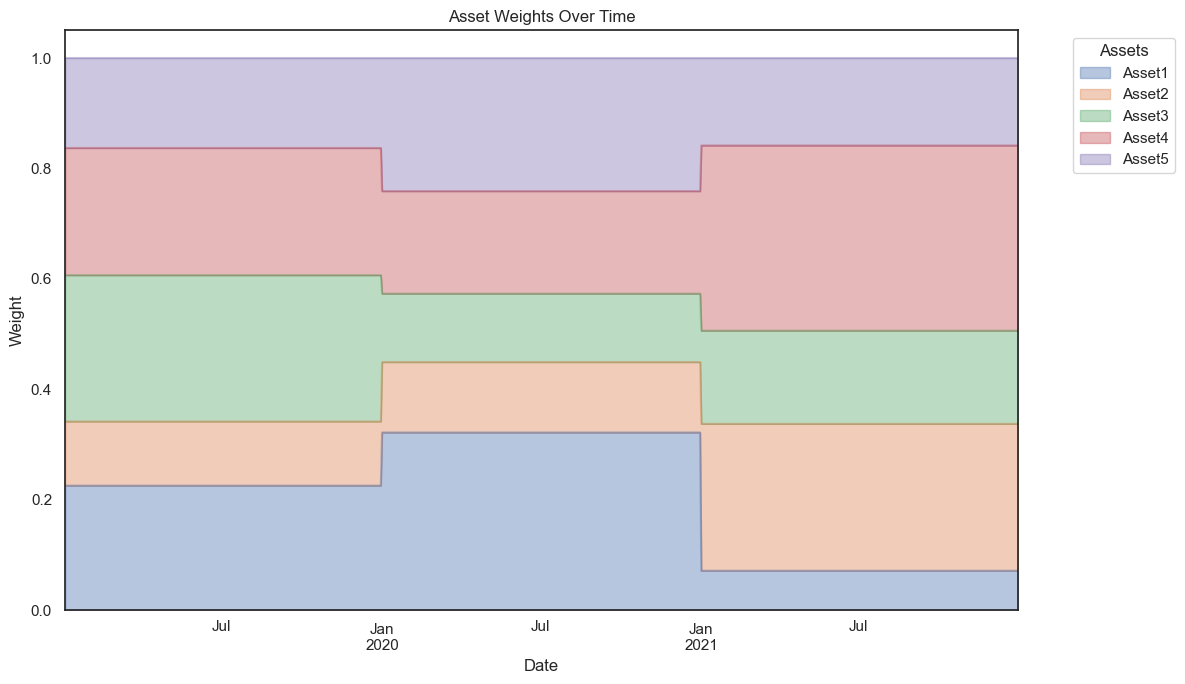

In [174]:
plot_asset_weights_over_time(portfolio_assets2)

In [175]:
def plot_cumulative_returns(portfolio_returns):
    """
    This function plots the cumulative returns of the portfolio.
    """
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label="Portfolio Cumulative Return", color='blue')
    plt.title('Historical Cumulative Returns of the Portfolio')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.tight_layout()
    plt.show()


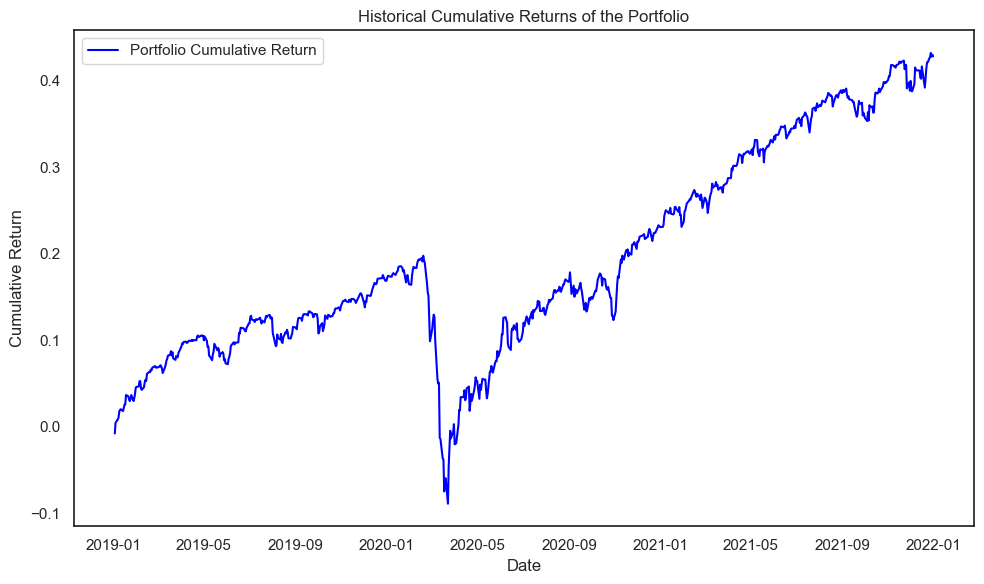

In [176]:
plot_cumulative_returns(portfolio_returns)

In [177]:
def calculate_annualized_return(portfolio_returns):
    """
    This function calculates the annualized return of the portfolio.
    """
    annualized_return = (1 + portfolio_returns.mean()) ** 261 - 1
    return annualized_return


In [178]:
calculate_annualized_return(portfolio_returns)

0.1329766764983673

In [179]:
def calculate_annualized_volatility(portfolio_returns):
    """
    This function calculates the annualized volatility of the portfolio.
    """
    annualized_volatility = portfolio_returns.std() * (261 ** 0.5)
    return annualized_volatility


In [180]:
calculate_annualized_volatility(portfolio_returns)

0.10832867068903887